<a href="https://colab.research.google.com/github/FeisTfue/distancias-clustering/blob/main/distancia_euclidiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resultado final:
dataset no | x | y | assignment
1 | 185 | 72 | 1
2 | 170 | 56 | 2
3 | 168 | 60 | 2
4 | 179 | 68 | 1
5 | 182 | 72 | 1
6 | 188 | 77 | 1


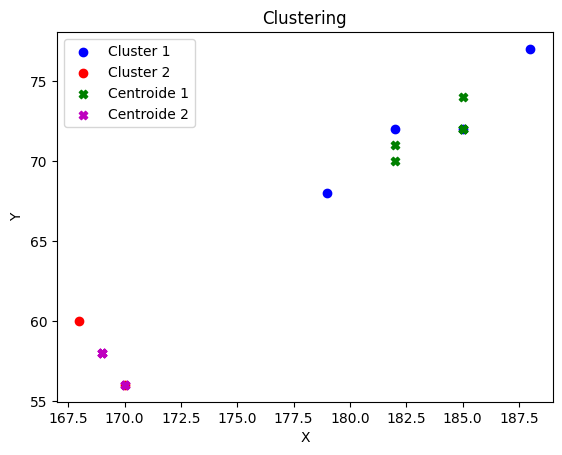

In [1]:
import matplotlib.pyplot as plt

# Datos iniciales
data = [
    (1, 185, 72),
    (2, 170, 56),
    (3, 168, 60),
    (4, 179, 68),
    (5, 182, 72),
    (6, 188, 77)
]

# Coordenadas de los centroides iniciales k1 y k2
k1 = (185, 72)
k2 = (170, 56)

# Función para calcular la distancia euclidiana
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    distance = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    return distance

# Listas para almacenar los puntos asignados a cada cluster
cluster1_points = []
cluster2_points = []

# Listas para almacenar los centroides a lo largo de las iteraciones
k1_x = [k1[0]]
k1_y = [k1[1]]
k2_x = [k2[0]]
k2_y = [k2[1]]

# Asignar puntos a clusters y actualizar centroides
for item in data:
    point_no, x, y = item
    distance_to_k1 = euclidean_distance((x, y), k1)
    distance_to_k2 = euclidean_distance((x, y), k2)

    if distance_to_k1 < distance_to_k2:
        assignment = 1
        k1 = ((k1[0] + x) / 2, (k1[1] + y) / 2)  # Actualizar k1
        cluster1_points.append((x, y))
    else:
        assignment = 2
        k2 = ((k2[0] + x) / 2, (k2[1] + y) / 2)  # Actualizar k2
        cluster2_points.append((x, y))

    # Actualizar las listas de centroides para la visualización
    k1_x.append(k1[0])
    k1_y.append(k1[1])
    k2_x.append(k2[0])
    k2_y.append(k2[1])

# Imprimir la tabla final de asignaciones
print("Resultado final:")
print("dataset no | x | y | assignment")
for i, item in enumerate(data, start=1):
    point_no, x, y = item
    distance_to_k1 = euclidean_distance((x, y), k1)
    distance_to_k2 = euclidean_distance((x, y), k2)

    if distance_to_k1 < distance_to_k2:
        assignment = 1
    else:
        assignment = 2

    print(f"{i} | {x} | {y} | {assignment}")

# Visualizar los puntos de datos y los centroides
plt.scatter(*zip(*cluster1_points), c='b', label='Cluster 1')
plt.scatter(*zip(*cluster2_points), c='r', label='Cluster 2')
plt.scatter(k1_x, k1_y, c='g', label='Centroide 1', marker='X')
plt.scatter(k2_x, k2_y, c='m', label='Centroide 2', marker='X')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.title('Clustering')
plt.show()